# Sentiment Scores and EDA

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer
      
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# easier to see full text with a bigger maxwidth:
pd.options.display.max_colwidth = 200

In [2]:
df_combined = pd.read_csv('./data/combined.csv')

In [3]:
df_combined.shape

(25288, 10)

In [4]:
df_combined['is_wsb'] = df_combined['subreddit'].map({'investing' : 0, 'wallstreetbets' : 1})

In [5]:
post_text = df_combined[['selftext', 'subreddit']]

In [6]:
corpus = list(post_text['selftext'])

In [7]:
#instantiate SIA
sia = SentimentIntensityAnalyzer()

#Get polarity scores for the first and last post
sia.polarity_scores(corpus[0]), sia.polarity_scores(corpus[-1])

({'neg': 0.067, 'neu': 0.825, 'pos': 0.108, 'compound': 0.9437},
 {'neg': 0.026, 'neu': 0.863, 'pos': 0.111, 'compound': 0.9261})

In [8]:
sentiment = []    

for post in corpus:
    scores = sia.polarity_scores(str(post))
    scores['selftext'] = post
    sentiment.append(scores)

df = pd.DataFrame(sentiment)
df.head()

,neg,neu,pos,compound,selftext
0,0.067,0.825,0.108,0.9437,"Jeremy Grantham, a value investor, [warned his clients that he finally start seeing bubbles forming in parts of the market and it would burst any time soon.](https://www.gmo.com/asia/research-libr..."
1,0.092,0.780,0.127,0.5573,"I feel like an utter scumbag for posting this, as I’m pretty sure there have been plenty of other people asking about this, or I’m just in for the hype but I’m actually really curious now.\n\nHow ..."
2,0.059,0.688,0.254,0.9365,"Hi, I recently downloaded Trading 212 intending to invest in multiple different companies like Tesla etc, but I dont understand how to properly invest in the stocks and how to tell which stocks ar..."
3,0.056,0.911,0.032,-0.4304,"I have a 401K plan with employer matching. Planning on maxing out the 401K contribution limit.\n\nI also have a Roth IRA account, which I already maxed out its contribution limit.\n\nI don't like..."
4,0.068,0.809,0.123,0.9011,"As the news of massive gains in GME has rocked the investing world, it begs the question: is value investing dead and is a ""join a giant group chat of pump-and-dump enthusiasts"" the future for the..."


In [9]:
df['target'] = df_combined['is_wsb'];

### Top 5 most positive and most negative posts in r/wallstreetbets

In [10]:
df1 = df[df['target'] == 1]
df1.sort_values(by='neg', ascending=False).head()

,neg,neu,pos,compound,selftext,target
20887,1.000,0.000,0.0,-0.1027,Nah,1
21422,1.000,0.000,0.0,-0.5574,BAN,1
13929,1.000,0.000,0.0,-0.1779,seriously,1
24506,0.989,0.011,0.0,-0.9996,WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF WTF \n\nMy calls :(,1
15452,0.860,0.140,0.0,-0.9995,Fuck this shit Fuck this shit Fuck this shit Fuck this shit Fuck this shit Fuck this shit Fuck this shit Fuck this shit Fuck this shit Fuck this shit Fuck this shit Fuck this shit Fuck this shit F...,1


In [11]:
df1.sort_values(by='pos', ascending=False).head()

,neg,neu,pos,compound,selftext,target
14105,0.0,0.000,1.000,0.2732,Yolo?,1
15451,0.0,0.000,1.000,0.6124,Please help,1
13108,0.0,0.000,1.000,0.7430,Happy Holidays,1
16643,0.0,0.199,0.801,0.9949,"&amp;#x200B;\n\n[Too short for mods so, GOD BLESS JPOW](https://preview.redd.it/lf7y45fecmm51.png?width=591&amp;format=png&amp;auto=webp&amp;s=f5e2e9afa91ecd25d3ad48c0f57f766ec43ead8e)\n\nGOD BLES...",1
13187,0.0,0.213,0.787,0.5719,Happy Christmas.,1


### Top 5 most positive and most negative posts in r/investing

In [12]:
df0 = df[df['target'] == 0]

In [13]:
df0.sort_values(by='pos', ascending = False).head()

,neg,neu,pos,compound,selftext,target
8916,0.007,0.100,0.893,0.9998,"Does folks invest with ETFs like VOO/VIX etx in there 401K account ,\n\nMy default goes to Dodge and Cox fund , wanted to know if I am missing some thing . \n\nTrying to make thsi post bigger \n\n...",0
9485,0.000,0.360,0.640,0.5502,Good read! \n\n\n [https://e-markets.nordea.com/article/59361/week-ahead-how-will-yield-curves-look-when-the-vaccine-is-ready?fbclid=IwAR1Sbz5Egjjc6zcUAcUv0McA4RZnzKC-L47Je\_u1tpuGMzabEpBGL\_pQ8...,0
7691,0.000,0.545,0.455,0.8176,8 Best Investment Apps of 2020 | Free Stock Trading and Investing\n\n[http://gtechbots.com/article/8-best-investment-apps-of-2020-free-stock-trading-and-investing](http://gtechbots.com/article/8-b...,0
475,0.000,0.554,0.446,0.9793,**Get $1000 Sent to Your Cash App!** \n\n&amp;#x200B;\n\n[https://binfileoffer.com/show.php?l=0&amp;u=350861&amp;id=30781](https://binfileoffer.com/show.php?l=0&amp;u=350861&amp;id=30781)\n\n&amp...,0
10419,0.000,0.569,0.431,0.9862,"\n\nHello,\n\nI'd like to follow a few firms that publish macro/asset allocation insights so I can make better decisions. I don't buy individual stocks, but I'd like to gain knowledge about ...",0


In [14]:
df0.sort_values(by='neg', ascending = False).head()

,neg,neu,pos,compound,selftext,target
4556,0.684,0.303,0.013,-0.9954,Would it be a good idea to start investing stock into that? I could see it exploding in the future. I'm not into Marijuana myself but I know it's a hit product.\n\nAny ideas of which ones to inves...,0
9143,0.441,0.498,0.061,-0.9886,"I'm tired of being wrong 80% of the time, sick of market makers manipulating the system and taking my money. I can't hold my gains for shit and I'm feeling really suicidal even though I haven't lo...",0
12437,0.370,0.630,0.000,-0.9201,dw.com/en/former-wirecard-ceo-markus-braun-arrested/a-53905720\n\n&gt;Prosecutors have arrested the former head of German payment services provider Wirecard on suspicion of accounting fraud and ma...,0
754,0.368,0.546,0.086,-0.9325,"Money printing goes beyond control, looming foreclosure and eviction crisis, commercial real estate losing value, irrational stock market behavior, negative-yielding debt and on and on.\n\nGold wa...",0
7586,0.348,0.652,0.000,-0.7065,[https://www.wsj.com/articles/delta-to-use-frequent-flier-program-to-raise-6-5-billion-11600082314?mod=hp\_lista\_pos1](https://www.wsj.com/articles/delta-to-use-frequent-flier-program-to-raise-6-...,0


In [15]:
df.groupby('target').mean()[['pos', 'neg', 'compound']]

,pos,neg,compound
target,,,
0,0.115054,0.041526,0.533276
1,0.096471,0.071593,0.147065


Text(0.5, 0, 'Score')

<Figure size 864x360 with 0 Axes>

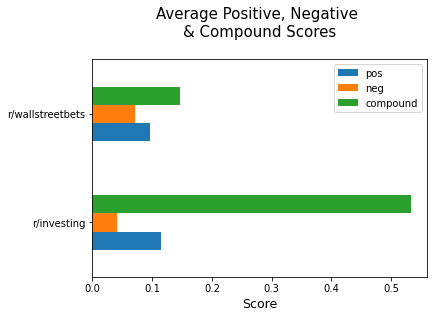

In [16]:
plt.figure(figsize=(12,5))
df.groupby('target').mean()[['pos', 'neg', 'compound']].plot(kind='barh')
plt.title('Average Positive, Negative \n& Compound Scores\n', fontsize=15);
plt.yticks([0, 1], ['r/investing', 'r/wallstreetbets'])
plt.ylabel('')
plt.xlabel('Score', fontsize=12.5)

### Comments on VADER scores:

The subreddit r/investing on a whole is more positive than r/wallstreetbets. They actually have similar average Positive scores, but the r/wallstreetbets subreddit has a higher negative score. On a whole, r/investing is very positive, with a mean compound score of about 0.53. R/wallstreetbets is still 

In [17]:
df.head()

,neg,neu,pos,compound,selftext,target
0,0.067,0.825,0.108,0.9437,"Jeremy Grantham, a value investor, [warned his clients that he finally start seeing bubbles forming in parts of the market and it would burst any time soon.](https://www.gmo.com/asia/research-libr...",0
1,0.092,0.780,0.127,0.5573,"I feel like an utter scumbag for posting this, as I’m pretty sure there have been plenty of other people asking about this, or I’m just in for the hype but I’m actually really curious now.\n\nHow ...",0
2,0.059,0.688,0.254,0.9365,"Hi, I recently downloaded Trading 212 intending to invest in multiple different companies like Tesla etc, but I dont understand how to properly invest in the stocks and how to tell which stocks ar...",0
3,0.056,0.911,0.032,-0.4304,"I have a 401K plan with employer matching. Planning on maxing out the 401K contribution limit.\n\nI also have a Roth IRA account, which I already maxed out its contribution limit.\n\nI don't like...",0
4,0.068,0.809,0.123,0.9011,"As the news of massive gains in GME has rocked the investing world, it begs the question: is value investing dead and is a ""join a giant group chat of pump-and-dump enthusiasts"" the future for the...",0


In [18]:
wsb_stonk_list = ['GME', 'NOK', 'BB', 'TSLA', 'PLTR', 'AAPL', 'AMD', 'BBBY', 'SPCE', 'MSFT']

In [26]:
wsb_top_list = []
for stock in wsb_stonk_list:
    wsb_top_dict = {}
    wsb_top_dict[stock] = [i for i in df['selftext'] if stock in str(i)]
    wsb_top_list.append(wsb_top_dict)

In [38]:
for post in wsb_top_list:
    print(post.keys())

dict_keys(['GME'])
dict_keys(['NOK'])
dict_keys(['BB'])
dict_keys(['TSLA'])
dict_keys(['PLTR'])
dict_keys(['AAPL'])
dict_keys(['AMD'])
dict_keys(['BBBY'])
dict_keys(['SPCE'])
dict_keys(['MSFT'])


In [42]:

for post in wsb_top_list:
    scores = sia.polarity_scores(str(post))
    scores['selftext'] = post
    scores['stock_name'] = post.keys()
    sentiment.append(scores)
    

df_stocks = pd.DataFrame(sentiment)
df_stocks.head()

,neg,neu,pos,compound,selftext,stock_name
0,0.067,0.825,0.108,0.9437,"Jeremy Grantham, a value investor, [warned his clients that he finally start seeing bubbles forming in parts of the market and it would burst any time soon.](https://www.gmo.com/asia/research-libr...",NaN
1,0.092,0.780,0.127,0.5573,"I feel like an utter scumbag for posting this, as I’m pretty sure there have been plenty of other people asking about this, or I’m just in for the hype but I’m actually really curious now.\n\nHow ...",NaN
2,0.059,0.688,0.254,0.9365,"Hi, I recently downloaded Trading 212 intending to invest in multiple different companies like Tesla etc, but I dont understand how to properly invest in the stocks and how to tell which stocks ar...",NaN
3,0.056,0.911,0.032,-0.4304,"I have a 401K plan with employer matching. Planning on maxing out the 401K contribution limit.\n\nI also have a Roth IRA account, which I already maxed out its contribution limit.\n\nI don't like...",NaN
4,0.068,0.809,0.123,0.9011,"As the news of massive gains in GME has rocked the investing world, it begs the question: is value investing dead and is a ""join a giant group chat of pump-and-dump enthusiasts"" the future for the...",NaN


In [40]:
df_stocks.head()

,neg,neu,pos,compound,selftext,stock_name
0,0.067,0.825,0.108,0.9437,"Jeremy Grantham, a value investor, [warned his clients that he finally start seeing bubbles forming in parts of the market and it would burst any time soon.](https://www.gmo.com/asia/research-libr...",NaN
1,0.092,0.780,0.127,0.5573,"I feel like an utter scumbag for posting this, as I’m pretty sure there have been plenty of other people asking about this, or I’m just in for the hype but I’m actually really curious now.\n\nHow ...",NaN
2,0.059,0.688,0.254,0.9365,"Hi, I recently downloaded Trading 212 intending to invest in multiple different companies like Tesla etc, but I dont understand how to properly invest in the stocks and how to tell which stocks ar...",NaN
3,0.056,0.911,0.032,-0.4304,"I have a 401K plan with employer matching. Planning on maxing out the 401K contribution limit.\n\nI also have a Roth IRA account, which I already maxed out its contribution limit.\n\nI don't like...",NaN
4,0.068,0.809,0.123,0.9011,"As the news of massive gains in GME has rocked the investing world, it begs the question: is value investing dead and is a ""join a giant group chat of pump-and-dump enthusiasts"" the future for the...",NaN


In [ ]:
df_stocks['stock'] = ''

In [ ]:
counter = 0
for stock in wsb_top_list:
    print(len(stock))

In [41]:
df_stocks.shape

(25314, 6)

In [ ]:
count=0
for stock in wsb_top_list:
    df_stocks['stock'][0:279] = wsb_stonk_list[0]
    df_stocks['stock'][280:280+26] = wsb_stonk_list[1]
    df_stocks['stock'][280:280+26] = wsb_stonk_list[2]
    df_stocks['stock'][280:280+26] = wsb_stonk_list[3]
    df_stocks['stock'][280:280+26] = wsb_stonk_list[4]
    df_stocks['stock'][280:280+26] = wsb_stonk_list[5]
    df_stocks['stock'][280:280+26] = wsb_stonk_list[6]
    df_stocks['stock'][280:280+26] = wsb_stonk_list[7]
    df_stocks['stock'][280:280+26] = wsb_stonk_list[8]
    df_stocks['stock'][280:280+26] = wsb_stonk_list[9]


In [ ]:
df_stocks.head()

In [ ]:
df_stocks.head()

[i for i in df['selftext'] if 'GME' in str(i)]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12, stratify = y)


tvec = TfidfVectorizer(stop_words = 'english', max_features = 3000)

X_train_tvec = tvec.fit_transform(X_train['selftext'])
X_test_tvec = tvec.transform(X_test['selftext'])

y_test.value_counts(normalize = True)

Baseline for this model is 50% accuracy. This was guaranteed because the number of documents in the combined dataframe is equal.

X_train_tvec = tvec.fit_transform(X_train['selftext'])
X_test_tvec = tvec.transform(X_test['selftext'])

tfidf.fit_transform(X_train_tvec)
tfidf.transform(X_test_tvec)

tfidf = TfidfVectorizer(lowercase = True,
                        stop_words = 'english',
                        ngram_range=(1,2),
                        max_df = 0.98

)